In [1]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### 卷积操作的作用

卷积是一种局部操作，通过一定大小的卷积核（滤波器）作用域局部图像区域获得图像的局部信息。以三种边缘卷积核来说明卷积神经网络中卷积操作的作用。在下图分别作用整体边缘卷积核（K_e）、横向边缘卷积核(K_h)、纵向边缘卷积核(K_v):

$$ K_e = \begin{bmatrix}
0 & -4& 0\\ 
-4& 16 & -4\\ 
0 & -4 & 0
\end{bmatrix} \ \ K_h = \begin{bmatrix}
1 & 2 & 1\\ 
0 & 0 & 0\\ 
-1 & -2 & -1
\end{bmatrix} \ \  K_v = \begin{bmatrix}
1 & 0 & -1\\ 
2 & 0 & -2\\ 
1 & 0 & -1
\end{bmatrix} $$

试想，若原图像素 (x, y) 处可能存在物体边缘，则其四周 (x-1, y)， (x+1, y), (x, y-1), (x, y+1) 处像素值应与 (x, y)处有显著差异。此时，如作用以整体边缘卷积核（K_e），可消除四周像素值差异小的图像区域而保留显著差异区域，以此可检测出物体边缘信息。同理，类似横向边缘卷积核(K_h)、纵向边缘卷积核(K_v)可分别保留横向、纵向的边缘信息。如下图，使用卷积核对原图进行处理：

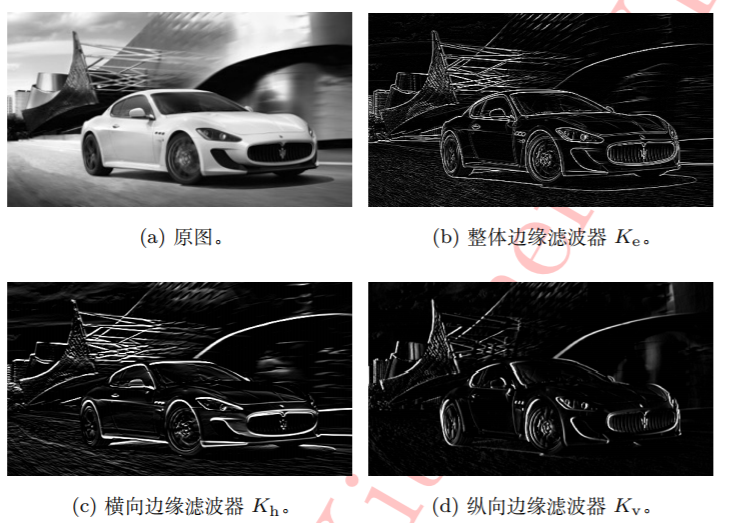

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Convolutional%20Neural%20Network/convolutional_neural_network01.png')

事实上，卷积网络中的卷积核参数是通过网络训练学出的，除了可以学到类似的横向、纵向边缘滤波器，还可以学到任意角度的边缘滤波器。当然，不仅如此，检测颜色、形状、纹理等等众多基本模式（pattern）的卷积核（滤波器）都可以包含在一个足够复杂的深层卷积神经网络中。通过“组合”这些卷积核（滤波器）以及随着网络后续操作的进行，基本而一般的模式会逐渐被抽象为具有高层语义的“概念”表示，并以此对应到具体的样本类别。颇有“盲人摸象”后，将各自结果集大成之意。

#### 池化的作用

池化主要为最大值池化和平均值池化。在上图的例子中可以发现，池化操作后的结果（图片）相比其输入（图片）减小了，其实池化操作实际上就是一种“降采样”（down-sampling）操作。另一方面，池化也看成是一个用p-范数（p-norm）作为非线性映射的“卷积”操作，特别的，当 p 趋近正无穷时就是最常见的最大值池化。如下图所示，左边为原图，右边为对该图做池化（降采样）操作，并不会改变物体对象。通过使用池化方法，可以降低网络需要学习的参数

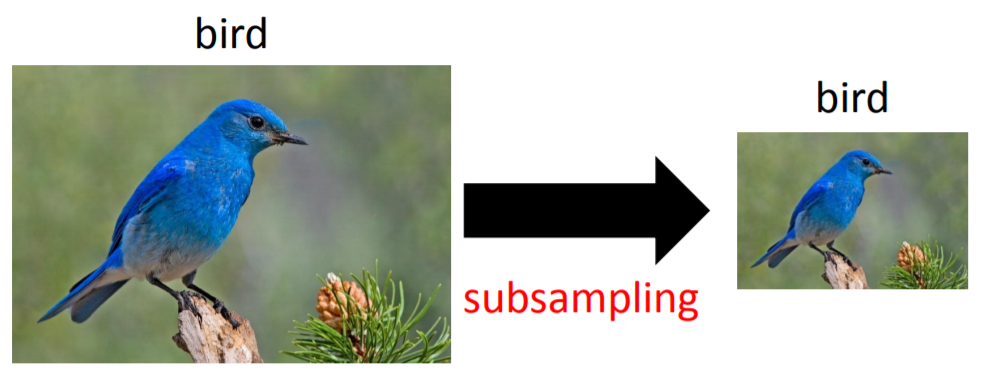

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Convolutional%20Neural%20Network/convolutional_neural_network02.png')

池化层的引入是仿照人的视觉系统对视觉输入对象进行降维（降采样）和抽象，池化作用：
- 特征不变性（feature invariant）。池化操作使模型更关注是否存在某些特征而不是特征具体的位置。可看作是一种很强的先验，使特征学习包含某种程度自由度，能容忍一些特征微小的位移；
- 特征降维。由于池化操作的降采样作用，池化结果中的一个元素对应于原输入数据的一个子区域（sub-region），因此池化相当于在空间范围内做了维度约减（spatially dimension reduction），从而使模型可以抽取更广范围的特征。同时减小了下一层输入大小，进而减小计算量和参数个数；
- 在一定程度防止过拟合（overfitting），更方便优化。

#### 激活函数

激活函数（activation function）层又称非线性映射（non-linearity mapping）层，顾名思义，激活函数的引入为的是增加整个网络的表达能力（即非线性）。否则，若干线性操作层的堆叠仍然只能起到线性映射的作用，多层线性层实际是一层线性层，无法形成复杂的函数。主要介绍两种激活函数，Sigmoid函数和relu函数：

$$ Sigmoid \ \ func: \sigma (x) = \frac{1}{1 + exp(-x)} \\
ReLU \ \ func:max (0, x) = \left\{\begin{matrix}
x & if \ x \geq 0\\ 
0 & if  \ x <  0
\end{matrix}\right.$$

使用Sigmoid函数后，输出值的区间被压缩到[0, 1]之间，而 0对应了生物神经元的“抑制状态”，1则恰好对应了“兴奋状态”。不过观察下图（左图）会发现在 Sigmoid函数两端，对于大于 5（或小于 −5）的值无论多大（或多小）都会压缩到1（或 0）。如此便带来一个严重问题，即梯度的“饱和效应”（saturation effect）。对照Sigmoid型函数的梯度图（右图），大于 5（或小于 −5）部分的梯度接近 1（或 0），这会导致在误差反向传播过程中导数处于该区域的误差将很难甚至根本无法传递至前层，进而导致整个网络无法训练（导数为0将无法更新网络参数）。此外，在参数初始化的时候还需特别注意，要避免初始化参数直接将输出值域带入这一区域：一种可能的情形是当初始化参数过大时，将直接引发梯度饱和效应而无法训练。

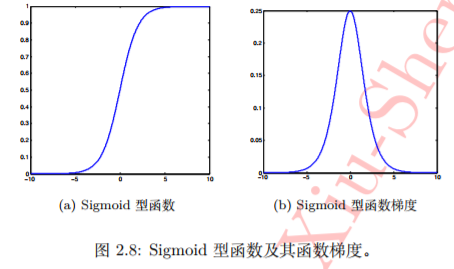

In [5]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Convolutional%20Neural%20Network/convolutional_neural_network03.png')

而ReLU函数的梯度在 x ≥ 0 时为1，反之为0。对 x ≥ 0 部分完全消除Sigmoid型函数的梯度饱和效应。同时，在实验中还发现相比Sigmoid型函数，ReLU函数有助于随机梯度下降方法收敛，收敛速度约快6倍左右。正是由于ReLU函数的这些优质特性，ReLU函数已成为目前卷积神经网络及其他深度学习模型激活函数的首选之一。注：ReLU在0点时存在无法求导的问题，这时神经网络随机给个数0或1就行，并且ReLU在0点的概率比价低。

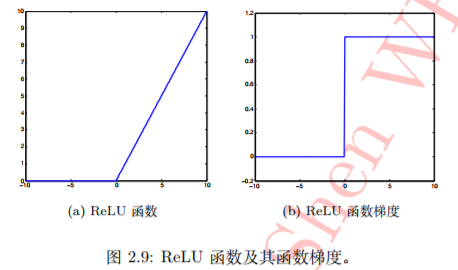

In [6]:
Image('https://raw.githubusercontent.com/martin-1992/\
deep-learning-note/master/Convolutional%20Neural%20Network/convolutional_neural_network04.png')

#### 全连接层

全连接层（fully connected layers）在整个卷积神经网络中起到“分类器”的作用。如果说卷积层、汇合层和激活函数层等操作是将原始数据映射到隐层特征
空间的话，全连接层则起到将学到的特征表示映射到样本的标记空间的作用。

#### 目标函数
刚才提到全连接层是将网络特征映射到样本的标记空间做出预测，目标函数的作用则用来衡量该预测值与真实样本标记之间的误差。在当下的卷积神经网络
中，交叉熵损失函数和 ℓ2 损失函数分别是分类问题和回归问题中最为常用的目标函数。

#### 接受域
接受域（receptive field）原指听觉、视觉等神经系统中一些神经元的特性，即神经元只接受其所支配的刺激区域内的信号。在视觉神经系统中，视觉皮层中神经细胞的输出依赖于视网膜上的光感受器。当光感受器受刺激兴奋时，会将神经冲动信号传导至视觉皮层。不过需指出并不是所有神经皮层中的神经元都会接受这些信号。而现代卷积神经网络中的接受域通过卷积

先以单层卷积操作为例（左图），如图是一个 7 × 7，步长为1的卷积操作，对后层的每一个输出神经元（如紫色区域）来说，它的前层接受域即为黄色区域，可以发现这与神经系统的接受域定义大同小异。不过，由于现代卷积神经网络拥有多层甚至超多层卷积操作，随着网络深度的加深，后层神经元在第一层输入层的接受域会随之增大。如右图所示为 3 × 3，步长为1的卷积操作，同单层卷积操作一样，相邻两层中后层神经元在前层的接受域仅为 3 × 3，但随着卷积操作的叠加，第L+3层的神经元在第L层的接受域可扩增至7 x 7。

也就是说，小卷积核（如 3 × 3）通过多层叠加可取得与大卷积核（如 7 × 7）同等规模的接受域，此外采用小卷积核同时可带来其余两个优势：第一，由于
小卷积核需多层叠加，加深了网络深度进而增强了网络容量（model capacity）和复杂度（model complexity）；第二，增强网络容量的同时减少了参数个数。若假设上述示例中卷积核对应的输入输出特征张量的深度均为 C，则 7 × 7 卷积核对应参数有 C × (7 × 7 × C) = 49C^2 个。而三层 3 × 3 卷积核堆叠只需三倍单层 3 × 3 卷积核个数的参数，即 3 × [C × (3 × 3 × C)] = 27C^2，远小于 7 × 7卷积核的参数个数。